In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [11]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [15]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [16]:
h, w, c = img.shape
#print(img.shape)
Z = img.reshape((-1,3))
K= 2
label, center =  km_clust(Z,K)

[[107.6958206   95.56751108  71.60331411]
 [163.22627536 197.72436505 120.58396853]]


## 1-2. cluster with RGB values and the location

[[156.36181009 180.01729694 110.30770958 514.3945102  766.92633767]
 [154.5291409  186.82526927 117.15223687 508.59306337 254.97709136]]
[[157.16718048 182.86539181 111.37227102 768.66114447 766.57197799]
 [157.08146533 179.20840048 122.855048   766.65095507 254.3836275 ]
 [155.62999619 177.53658295 109.36868341 256.96096651 767.82572679]
 [151.90828674 194.06906759 111.31168454 254.36179989 256.03356556]]
[[144.37087632 143.61458108 102.5687727  857.70035354 530.24843471]
 [161.14157038 186.45544128 117.16519162 238.46127318 875.20359748]
 [152.32796611 194.62003856 111.75314628 174.03689484 169.8557055 ]
 [165.08293823 188.63700864 135.58662026 852.1326625  172.14763442]
 [162.44375008 206.84984207 118.17322995 778.36493649 877.10737573]
 [154.61069991 199.19666931 115.83124064 517.42408289 207.07000617]
 [157.84251733 199.3878702  110.15503308 171.4407845  522.75036232]
 [144.07106947 143.29161413  98.22676196 511.953847   607.24612305]]
[[161.49148724 188.98248966 114.80690147 126.

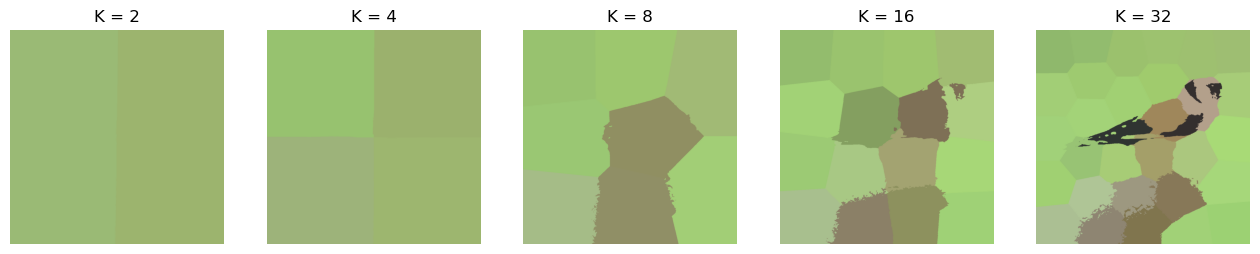

In [17]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

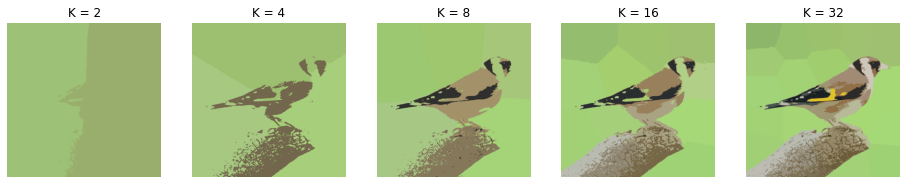

[[157.9032644  193.11779552 119.89415975 121.98867719  61.11573926]
 [153.24574286 174.7143454  108.18975936 133.15220159 187.72596108]]
[[166.09629595 199.77368708 129.57142146 167.46031519  51.41241893]
 [157.91721748 192.63886046 112.36131199  45.78526145 125.15396908]
 [167.56006976 206.14058032 122.99628642 169.71309782 211.6922331 ]
 [113.91394822 101.82257938  75.80511163 173.33092656 137.80779735]]
[[156.1519661  200.88291221 114.49361282  66.89952175  42.18054192]
 [164.63327115 211.27799219 120.44123477 194.49363522 212.20694048]
 [167.96627714 200.57561237 133.50290084 187.66028019  52.84038576]
 [166.67478709 198.55551747 122.29969377  56.74251756 220.94348652]
 [132.40002668 120.11845302  90.56936915 218.29019418 127.85943946]
 [162.61332708 144.82597972 105.52275927 123.61186472 156.71899316]
 [158.13178262 199.68665272 110.69196966  45.19597849 126.63469285]
 [ 47.02137279  47.97533909  45.90711056 116.8203992  136.62539175]]
[[162.13468516 209.39944422 120.24706639 102.

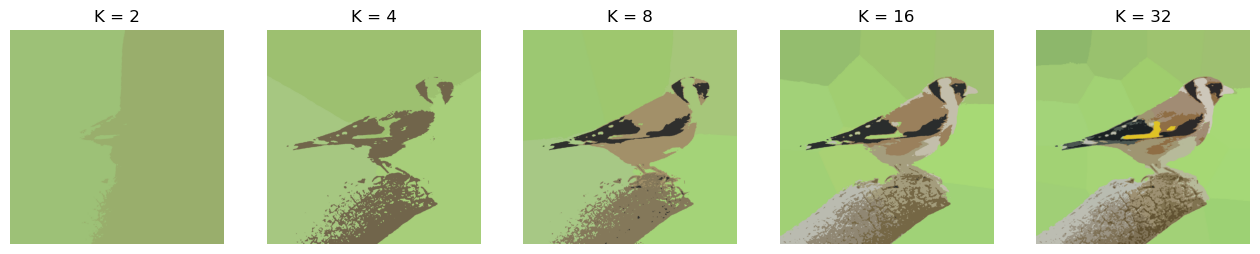

In [22]:
h, w, c = img.shape

Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4],[w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()